## Module 20 Challenge- Unsupervised Machine Learning Challenge

### By: Zack Crowley

### Import the dependencies and data:

In [1]:
# Import dependencies:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Part 1: Prepare the Data

- 1. Read myopia.csv into a Pandas DataFrame.

In [2]:
# Read in the data:
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


- 2. Remove the "MYOPIC" column from the dataset.

In [3]:
# Drop MYOPIC col:
df = myopia_df.drop("MYOPIC", axis='columns')
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [4]:
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

- 3. Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [5]:
# Create a scaler to standardize the data:
# Create a StandardScaler() model and fit it to the training data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']])
scaled_df

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

In [6]:
# Create a new df from the scaled data:
new_df = pd.DataFrame(scaled_df)
# Rename the columns:
new_df.rename(columns={0: "AGE", 1: "SPHEQ", 2: "AL", 3: "ACD", 4: "LT", 5: "VCD", 6: "SPORTHR", 7: "READHR", 8: "COMPHR", 9: "STUDYHR", 10: "TVHR",11: "DIOPTERHR", 12: "MOMMY", 13: "DADMY"}, inplace=True)
new_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769


In [7]:
# Save the clean and scaled DataFrame as a new CSV file for further use later:
file_path_new = Path("Resources/new_myopia_data.csv")
new_df.to_csv(file_path_new, index=False)

### Part 2: Apply Dimensionality Reduction

In [8]:
# Read in transformed data, which was previously cleaned and standardized:
file_path_clean = Path("Resources/new_myopia_data.csv")
myopia_clean_df = pd.read_csv(file_path_clean)
myopia_clean_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769


- 1. Perform dimensionality reduction with PCA. How did the number of the features change?



In [9]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get the principal components for the data that preserves 90% of the explained variance: 
myopia_pca = pca.fit_transform(myopia_clean_df)
myopia_pca

array([[ 5.35502713e-01,  1.14500427e+00, -1.38501894e+00, ...,
        -1.92299652e+00,  2.67528503e-02,  1.78143856e-01],
       [-6.24705593e-01, -1.57578643e+00, -7.94253057e-01, ...,
         2.85332291e-01,  6.89682613e-01, -5.57030831e-01],
       [-9.33479366e-01, -7.17076224e-01,  8.20149929e-01, ...,
        -3.08170124e-02, -4.31499076e-01,  1.33358217e-02],
       ...,
       [-8.90082017e-01, -2.30800520e+00,  2.68101833e-01, ...,
        -4.89876908e-01,  1.82269069e+00,  8.17765449e-02],
       [-1.12399979e+00,  4.51889784e-01,  1.65865634e-03, ...,
         2.39685015e-01, -1.59282241e+00, -1.01458084e+00],
       [-6.91533913e-01, -7.37046188e-01, -1.05290000e+00, ...,
        -2.73804495e-01,  9.46160724e-01,  4.95797353e-01]])

In [10]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2", "principal component 3", "principal component 4", "principal component 5", 
                              "principal component 6","principal component 7", "principal component 8","principal component 9", "principal component 10"]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


##### Performing dimensionality reduction with PCA on the transformed myopia data dropped 4 columns and preserved 10 columns, changing the number of features from 14 to 10.

- 2. Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.



In [11]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

# Check the number of features:
tsne_features.shape
# The dataset has 2 columns, so t-SNE transformation changed the features from 10 to 2.


/Users/zackwcrowley/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(618, 2)

- 3. Create a scatter plot of the t-SNE output. Are there distinct clusters?



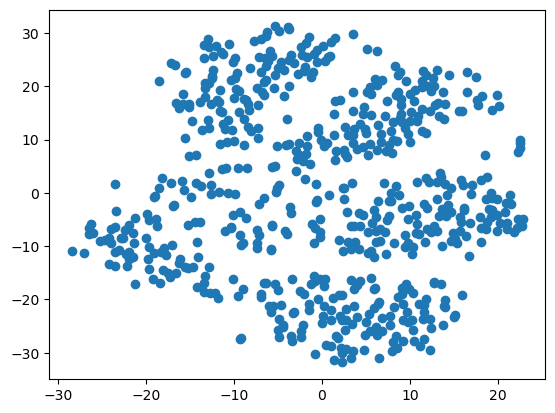

In [12]:
# Prepare to plot the dataset
# Set up an empty df:
df_tsne_plot = pd.DataFrame()
# The first column of transformed features
df_tsne_plot['x'] = tsne_features[:,0]

# The second column of transformed features
df_tsne_plot['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(df_tsne_plot['x'], df_tsne_plot['y'])
plt.show()
# There does not appear to be two distinct clusters in the plot of the t-SNE transformed data, just one blob.

##### There are not distinct clusters when visualizing the t-SNE results (which reduced the features from 10 (PCA results) to 2).

### Part 3: Perform a Cluster Analysis with K-means
- Create an elbow plot to identify the best number of clusters. Make sure to do the following:

- Use a for loop to determine the inertia for each k between 1 through 10.

- If possible, determine where the elbow of the plot is, and at which value of k it appears.

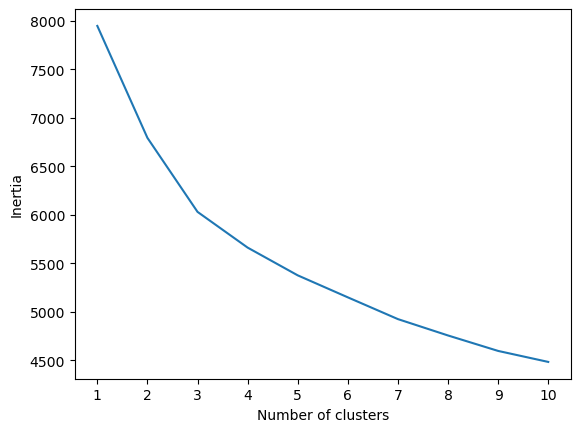

In [16]:
# Perform a Cluster Analysis with K-means on the PCA transformed data: df_myopia_pca
inertia = []
# Set up a list of 1-10 for K:
k = list(range(1, 11))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# There may be an elbow at 3 clusters

### Part 4: Make a Recommendation
 - Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?

Recommendation: There appears to be clusters between 3 and 10.